<a href="https://colab.research.google.com/github/meersajid/colabs/blob/main/FAI_01_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cats and Dogs**

In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)/'images'
path

Path('/root/.fastai/data/oxford-iiit-pet/images')

In [ ]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(0)

epoch,train_loss,valid_loss,error_rate,time
0,0.167492,0.022729,0.007442,00:49


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


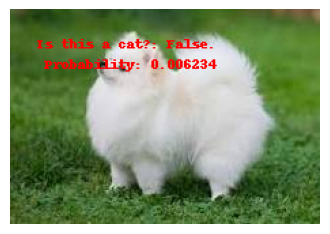

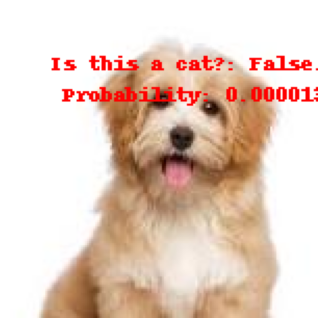

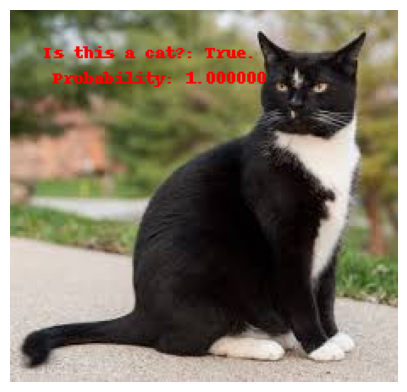

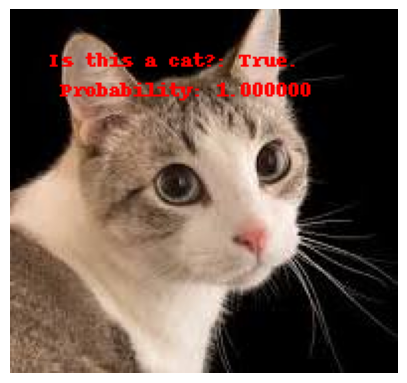

In [ ]:
import glob
from PIL import Image, ImageDraw

examples = glob.glob('/content/sample_data/cat_example*.jpeg')
uploader = SimpleNamespace(data = examples)
for animal in uploader.data:
  img = PILImage.create(animal)
  is_cat,_,probs = learn.predict(img)
  txt = f"Is this a cat?: {is_cat}.\n Probability: {probs[1].item():.6f}"
  draw = ImageDraw.Draw(img)
  draw.text((20, 20), txt, fill =(255, 0, 0))
  img.show()



---



# Movie Reviews

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.450186,0.391518,0.825280,03:16


epoch,train_loss,valid_loss,accuracy,time
0,0.310755,0.354268,0.838120,07:26
1,0.246659,0.205292,0.918960,07:30
2,0.192658,0.186369,0.929760,07:30
3,0.144232,0.190942,0.930080,07:30


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([1.0312e-04, 9.9990e-01]))

In [ ]:
learn.predict("Stay away")


('pos', tensor(1), tensor([0.1907, 0.8093]))



---

